In [43]:
# coding: utf-8
#
# CS 6204 - Network Science Homework 2 - Prof. Cho
# Demetrius Davis (2019) - dldavis@vt.edu
#

#
# SECTION 1 - IMPORTS
#
import networkx as nx   
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import warnings

In [52]:
# If you are using Jupyter Notebook you may find following two lines useful:
warnings.filterwarnings('ignore')
% matplotlib inline

In [55]:
#
# SECTION 3 - ALGORITHM SELECTION
#

# Get parameters
network_type = int(input("Select network model (1 - Random, 2 - Scale-Free, 3 - Small World): "))

# Random >> Erdos-Renyi (ER)
if network_type == 1:
    print("***\nErdos-Renyi (ER) model simulation\n\n")

    # Get parameters
    final_nodes = int(input("\nPlease type in the final number of nodes (n): "))
    p_conn_nodes = float(input("Please type in the probability of connected vertices (p): "))

    print("\n")
    print("Creating initial graph...")

    G = nx.erdos_renyi_graph(final_nodes, p_conn_nodes)

    print("Graph created. Number of nodes: {}".format(len(G.nodes())))
    print("Adding nodes...")

# Scale-Free >> Barabási–Albert (BA)
elif network_type == 2:
    # Barabási–Albert Network Model
    # Written by: Aleksander Molak (2017), Modified by: Demetrius Davis (2019)
    print("***\nBarabási–Albert (BA) model simulation\n\n")

    # Get parameters
    final_nodes = int(input("\nPlease type in the final number of nodes (n): "))
    init_nodes = int(input("Please type in the initial number of nodes (m_0): "))
    m_parameter = int(input("\nPlease type in the number of new edges added (m'): "))

    print("\n")
    print("Creating initial graph...")

    G = nx.complete_graph(init_nodes)
    #G = nx.barabasi_albert_graph(final_nodes, m_parameter)

    print("Graph created. Number of nodes: {}".format(len(G.nodes())))
    print("Adding nodes...")

# Small World >> Watts and Strogatz (WS)
elif network_type == 3:
    print("***\nWatts and Strogatz (WS) model simulation\n\n")

    # Get parameters
    final_nodes = int(input("\nPlease type in the final number of nodes (n): "))
    p_rewiring = float(input("Please type in the rewiring probability (p): "))
    num_neighbors = int(input("\nPlease type in the number of nearest neighbors (K): "))

    print("\n")
    print("Creating initial graph...")

    G = nx.watts_strogatz_graph(final_nodes, num_neighbors, p_rewiring)

    print("Graph created. Number of nodes: {}".format(len(G.nodes())))
    print("Adding nodes...")


Select network model (1 - Random, 2 - Scale-Free, 3 - Small World): 2
***
Barabási–Albert (BA) model simulation



Please type in the final number of nodes (n): 100
Please type in the initial number of nodes (m_0): 4

Please type in the number of new edges added (m'): 4


Creating initial graph...
Graph created. Number of nodes: 4
Adding nodes...


In [56]:
def rand_prob_node():
    nodes_probs = []
    for node in G.nodes():
        node_degr = G.degree(node)
        print("r_p_n(): {}".format(node_degr))
        node_proba = node_degr / (2 * len(G.edges()))
        #print("Node proba is: {}".format(node_proba))
        nodes_probs.append(node_proba)
        #print("Nodes probablities: {}".format(nodes_probs))
    random_proba_node = rd.choice(G.nodes(),p=nodes_probs)
    print("Randomly selected node is: {}".format(random_proba_node))
    return random_proba_node

def add_edge():
        if len(G.edges()) == 0:
            random_proba_node = 0
        else:
            random_proba_node = rand_prob_node()
        new_edge = (random_proba_node, new_node)
        if new_edge in G.edges():
            print("add_edge(): Random edge is already present")
            add_edge()
        else:
            print("add_edge(): Random edge is not present -- adding new edge")
            G.add_edge(new_node, random_proba_node)
            print("Edge added: {} {}".format(new_node + 1, random_proba_node))

if network_type == 2:
    count = 0
    new_node = init_nodes

    for f in range(final_nodes - init_nodes):
        print("----------> Step {} <----------".format(count))
        G.add_node(init_nodes + count)
        print("Node added: {}".format(init_nodes + count + 1))
        count += 1
        
        for e in range(0, m_parameter):
            add_edge()
        new_node += 1

    print("\nFinal number of nodes ({}) reached".format(len(G.nodes())))

----------> Step 0 <----------
Node added: 5
r_p_n(): 3
r_p_n(): 3
r_p_n(): 3
r_p_n(): 3
r_p_n(): 0
Randomly selected node is: 3
add_edge(): Random edge is not present -- adding new edge
Edge added: 5 3
r_p_n(): 3
r_p_n(): 3
r_p_n(): 3
r_p_n(): 4
r_p_n(): 1
Randomly selected node is: 0
add_edge(): Random edge is not present -- adding new edge
Edge added: 5 0
r_p_n(): 4
r_p_n(): 3
r_p_n(): 3
r_p_n(): 4
r_p_n(): 2
Randomly selected node is: 0
add_edge(): Random edge is already present
r_p_n(): 4
r_p_n(): 3
r_p_n(): 3
r_p_n(): 4
r_p_n(): 2
Randomly selected node is: 4
add_edge(): Random edge is not present -- adding new edge
Edge added: 5 4
r_p_n(): 4
r_p_n(): 3
r_p_n(): 3
r_p_n(): 4
r_p_n(): 4
Randomly selected node is: 4
add_edge(): Random edge is already present
r_p_n(): 4
r_p_n(): 3
r_p_n(): 3
r_p_n(): 4
r_p_n(): 4
Randomly selected node is: 0
add_edge(): Random edge is already present
r_p_n(): 4
r_p_n(): 3
r_p_n(): 3
r_p_n(): 4
r_p_n(): 4
Randomly selected node is: 0
add_edge(): Rand

r_p_n(): 13
r_p_n(): 13
r_p_n(): 9
r_p_n(): 6
r_p_n(): 9
r_p_n(): 6
r_p_n(): 5
r_p_n(): 6
r_p_n(): 7
r_p_n(): 6
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 3
Randomly selected node is: 10
add_edge(): Random edge is not present -- adding new edge
Edge added: 21 10
----------> Step 17 <----------
Node added: 22
r_p_n(): 11
r_p_n(): 8
r_p_n(): 5
r_p_n(): 10
r_p_n(): 13
r_p_n(): 13
r_p_n(): 9
r_p_n(): 6
r_p_n(): 9
r_p_n(): 6
r_p_n(): 6
r_p_n(): 6
r_p_n(): 7
r_p_n(): 6
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 0
Randomly selected node is: 3
add_edge(): Random edge is not present -- adding new edge
Edge added: 22 3
r_p_n(): 11
r_p_n(): 8
r_p_n(): 5
r_p_n(): 11
r_p_n(): 13
r_p_n(): 13
r_p_n(): 9
r_p_n(): 6
r_p_n(): 9
r_p_n(): 6
r_p_n(): 6
r_p_n(): 6
r_p_n(): 7
r_p_n(): 6
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 1
Randomly selected node is: 10
add_edge(): Random edge is not p

r_p_n(): 14
r_p_n(): 11
r_p_n(): 5
r_p_n(): 15
r_p_n(): 13
r_p_n(): 14
r_p_n(): 10
r_p_n(): 7
r_p_n(): 12
r_p_n(): 6
r_p_n(): 9
r_p_n(): 6
r_p_n(): 8
r_p_n(): 8
r_p_n(): 5
r_p_n(): 10
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 3
Randomly selected node is: 20
add_edge(): Random edge is not present -- adding new edge
Edge added: 29 20
----------> Step 25 <----------
Node added: 30
r_p_n(): 14
r_p_n(): 11
r_p_n(): 5
r_p_n(): 15
r_p_n(): 13
r_p_n(): 14
r_p_n(): 10
r_p_n(): 7
r_p_n(): 12
r_p_n(): 6
r_p_n(): 9
r_p_n(): 6
r_p_n(): 8
r_p_n(): 8
r_p_n(): 5
r_p_n(): 10
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 0
Randomly selected node is: 15
add_edge(): Random edge is not present -- adding new edge
Edge added: 30 15
r_p_n(): 14
r_p_n(): 11
r_p_n(): 5
r_p_n(): 15
r_p_n(): 13
r_p_n(): 14
r_p_n

r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 2
Randomly selected node is: 31
add_edge(): Random edge is not present -- adding new edge
Edge added: 38 31
r_p_n(): 16
r_p_n(): 11
r_p_n(): 6
r_p_n(): 19
r_p_n(): 15
r_p_n(): 15
r_p_n(): 12
r_p_n(): 7
r_p_n(): 13
r_p_n(): 8
r_p_n(): 11
r_p_n(): 6
r_p_n(): 10
r_p_n(): 9
r_p_n(): 6
r_p_n(): 11
r_p_n(): 9
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 8
r_p_n(): 5
r_p_n(): 4
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 3
Randomly selected node is: 25
add_edge(): Random edge is not present -- adding new edge
Edge added: 38 25
----------> Step 34 <----------
Node added: 39
r_p_n(): 16
r_p_n(): 11
r_p_n(): 6
r_p_n(): 19
r_p_n(): 15
r_p_n(): 15
r_p_n(): 12
r_p_n(): 7
r_p_n(): 13
r_p_n(): 8
r_p_n(): 11
r_p_n(): 6
r_p_n(): 10
r_p_n(): 9
r_p_n(): 6
r_p_n(): 11
r_p_n(): 9
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(

r_p_n(): 6
r_p_n(): 11
r_p_n(): 11
r_p_n(): 8
r_p_n(): 11
r_p_n(): 9
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 8
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 4
r_p_n(): 8
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 3
Randomly selected node is: 40
add_edge(): Random edge is not present -- adding new edge
Edge added: 44 40
----------> Step 40 <----------
Node added: 45
r_p_n(): 19
r_p_n(): 11
r_p_n(): 6
r_p_n(): 20
r_p_n(): 16
r_p_n(): 15
r_p_n(): 13
r_p_n(): 7
r_p_n(): 14
r_p_n(): 8
r_p_n(): 12
r_p_n(): 6
r_p_n(): 11
r_p_n(): 11
r_p_n(): 8
r_p_n(): 11
r_p_n(): 9
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 8
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 4
r_p_n(): 8
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n():

r_p_n(): 5
r_p_n(): 8
r_p_n(): 5
r_p_n(): 5
r_p_n(): 7
r_p_n(): 6
r_p_n(): 6
r_p_n(): 6
r_p_n(): 4
r_p_n(): 6
r_p_n(): 7
r_p_n(): 4
r_p_n(): 10
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 0
Randomly selected node is: 16
add_edge(): Random edge is not present -- adding new edge
Edge added: 52 16
r_p_n(): 21
r_p_n(): 15
r_p_n(): 6
r_p_n(): 21
r_p_n(): 16
r_p_n(): 15
r_p_n(): 13
r_p_n(): 8
r_p_n(): 16
r_p_n(): 8
r_p_n(): 13
r_p_n(): 7
r_p_n(): 11
r_p_n(): 11
r_p_n(): 9
r_p_n(): 13
r_p_n(): 10
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 8
r_p_n(): 5
r_p_n(): 5
r_p_n(): 7
r_p_n(): 6
r_p_n(): 6
r_p_n(): 6
r_p_n(): 4
r_p_n(): 6
r_p_n(): 7
r_p_n(): 4
r_p_n(): 10
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5


r_p_n(): 11
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 3
Randomly selected node is: 14
add_edge(): Random edge is not present -- adding new edge
Edge added: 57 14
----------> Step 53 <----------
Node added: 58
r_p_n(): 22
r_p_n(): 16
r_p_n(): 9
r_p_n(): 22
r_p_n(): 17
r_p_n(): 17
r_p_n(): 13
r_p_n(): 9
r_p_n(): 18
r_p_n(): 8
r_p_n(): 13
r_p_n(): 7
r_p_n(): 11
r_p_n(): 11
r_p_n(): 10
r_p_n(): 13
r_p_n(): 10
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 9
r_p_n(): 6
r_p_n(): 5
r_p_n(): 8
r_p_n(): 7
r_p_n(): 7
r_p_n(): 6
r_p_n(): 4
r_p_n(): 8
r_p_n(): 8
r_p_n(): 4
r_p_n(): 11
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n()

r_p_n(): 22
r_p_n(): 19
r_p_n(): 17
r_p_n(): 13
r_p_n(): 9
r_p_n(): 19
r_p_n(): 8
r_p_n(): 13
r_p_n(): 7
r_p_n(): 12
r_p_n(): 12
r_p_n(): 10
r_p_n(): 14
r_p_n(): 10
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 9
r_p_n(): 6
r_p_n(): 5
r_p_n(): 8
r_p_n(): 9
r_p_n(): 7
r_p_n(): 6
r_p_n(): 4
r_p_n(): 8
r_p_n(): 8
r_p_n(): 4
r_p_n(): 11
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 8
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 0
Randomly selected node is: 24
add_edge(): Random edge is not present -- adding new edge
Edge added: 62 24
r_p_n(): 22
r_p_n(): 16
r_p_n(): 10
r_p_n(): 22
r_p_n(): 19
r_p_n(): 17
r_p_n(): 13
r_p_n(): 9
r_p_n(): 19
r_p_n(): 8
r_p_n(): 13
r_p_n(): 7
r_p_n(): 12
r_p_n(): 12
r_p_n(): 10
r_p_n(): 14
r_p_n(): 10
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5

r_p_n(): 12
r_p_n(): 13
r_p_n(): 15
r_p_n(): 11
r_p_n(): 6
r_p_n(): 5
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 5
r_p_n(): 9
r_p_n(): 10
r_p_n(): 7
r_p_n(): 6
r_p_n(): 5
r_p_n(): 8
r_p_n(): 9
r_p_n(): 4
r_p_n(): 12
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 8
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 2
Randomly selected node is: 8
add_edge(): Random edge is not present -- adding new edge
Edge added: 67 8
r_p_n(): 22
r_p_n(): 16
r_p_n(): 11
r_p_n(): 23
r_p_n(): 20
r_p_n(): 18
r_p_n(): 14
r_p_n(): 9
r_p_n(): 21
r_p_n(): 9
r_p_n(): 14
r_p_n(): 7
r_p_n(): 12
r_p_n(): 12
r_p_n(): 13
r_p_n(): 15
r_p_n(): 11
r_p_n(): 6
r_p_n(): 5
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 5
r_p_n(): 9
r_p_n(): 10
r_p_

r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 2
Randomly selected node is: 0
add_edge(): Random edge is not present -- adding new edge
Edge added: 72 0
r_p_n(): 23
r_p_n(): 17
r_p_n(): 11
r_p_n(): 24
r_p_n(): 21
r_p_n(): 20
r_p_n(): 14
r_p_n(): 9
r_p_n(): 22
r_p_n(): 9
r_p_n(): 14
r_p_n(): 7
r_p_n(): 12
r_p_n(): 13
r_p_n(): 13
r_p_n(): 15
r_p_n(): 12
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 5
r_p_n(): 9
r_p_n(): 10
r_p_n(): 7
r_p_n(): 7
r_p_n(): 5
r_p_n(): 8
r_p_n(): 9
r_p_n(): 4
r_p_n(): 12
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 9
r_p_n(): 5
r_p_n(): 6
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5

r_p_n(): 24
r_p_n(): 17
r_p_n(): 11
r_p_n(): 25
r_p_n(): 22
r_p_n(): 21
r_p_n(): 15
r_p_n(): 10
r_p_n(): 23
r_p_n(): 9
r_p_n(): 14
r_p_n(): 7
r_p_n(): 13
r_p_n(): 13
r_p_n(): 14
r_p_n(): 16
r_p_n(): 12
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 5
r_p_n(): 9
r_p_n(): 10
r_p_n(): 7
r_p_n(): 7
r_p_n(): 5
r_p_n(): 8
r_p_n(): 9
r_p_n(): 4
r_p_n(): 12
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 9
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 6
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 0
Randomly selected node is: 40
add_edge(): Random edge is not present -- adding new edge
Edge added: 77 40
r_p_n(): 24
r_p_n(): 17
r_p_n

r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 5
r_p_n(): 9
r_p_n(): 13
r_p_n(): 7
r_p_n(): 7
r_p_n(): 5
r_p_n(): 8
r_p_n(): 10
r_p_n(): 4
r_p_n(): 12
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 6
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 6
r_p_n(): 4
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 2
Randomly selected node is: 0
add_edge(): Random edge is already present
r_p_n(): 25
r_p_n(): 17
r_p_n(): 12
r_p_n(): 25
r_p_n(): 22
r_p_n(): 21
r_p_n(): 15
r_p_n(): 10
r_p_n(): 23
r_p_n(): 9
r_p_n(): 16
r_p_n(): 8
r_p_n(): 15
r_p_n(): 13
r_p_n(): 14
r_p_n(): 16
r_p_n(): 12
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(

r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 0
Randomly selected node is: 8
add_edge(): Random edge is not present -- adding new edge
Edge added: 84 8
r_p_n(): 25
r_p_n(): 17
r_p_n(): 12
r_p_n(): 25
r_p_n(): 22
r_p_n(): 21
r_p_n(): 15
r_p_n(): 11
r_p_n(): 24
r_p_n(): 9
r_p_n(): 17
r_p_n(): 8
r_p_n(): 16
r_p_n(): 14
r_p_n(): 14
r_p_n(): 16
r_p_n(): 12
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 5
r_p_n(): 9
r_p_n(): 13
r_p_n(): 7
r_p_n(): 7
r_p_n(): 5
r_p_n(): 8
r_p_n(): 10
r_p_n(): 4
r_p_n(): 13
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 7
r_p_n(): 6
r_p_n(): 5
r_p_n(): 6
r_p_n(): 4
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n()

r_p_n(): 7
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 5
r_p_n(): 9
r_p_n(): 13
r_p_n(): 8
r_p_n(): 7
r_p_n(): 5
r_p_n(): 8
r_p_n(): 10
r_p_n(): 4
r_p_n(): 13
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 10
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 5
r_p_n(): 8
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 7
r_p_n(): 6
r_p_n(): 5
r_p_n(): 6
r_p_n(): 4
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 3
Randomly selected node is: 45
add_edge(): Random edge is not present -- adding new edge
Edge added: 86 45
----------> Step 82 <----------
Node added: 87
r_p_n(): 26
r_p_n(): 17
r_p_n(): 12
r_p_n(): 25
r_p_n(): 22
r_p_n(): 21
r_p_n(): 15
r_p_n(): 1

r_p_n(): 9
r_p_n(): 13
r_p_n(): 8
r_p_n(): 7
r_p_n(): 5
r_p_n(): 8
r_p_n(): 11
r_p_n(): 4
r_p_n(): 13
r_p_n(): 4
r_p_n(): 7
r_p_n(): 5
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 10
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 8
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 7
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 4
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 0
Randomly selected node is: 3
add_edge(): Random edge is not present -- adding new edge
Edge added: 90 3
r_p_n(): 26
r_p_n(): 17
r_p_n(): 12
r_p_n(): 26
r_p_n(): 22
r_p_n(): 21
r_p_n(): 16
r_p_n(): 11
r_p_n(): 26
r_p_n(): 9
r_p_n(): 17
r_p_n(): 8
r_p_n(): 16
r

r_p_n(): 12
r_p_n(): 26
r_p_n(): 24
r_p_n(): 23
r_p_n(): 16
r_p_n(): 11
r_p_n(): 26
r_p_n(): 9
r_p_n(): 17
r_p_n(): 8
r_p_n(): 17
r_p_n(): 15
r_p_n(): 17
r_p_n(): 18
r_p_n(): 13
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 10
r_p_n(): 6
r_p_n(): 5
r_p_n(): 9
r_p_n(): 13
r_p_n(): 8
r_p_n(): 7
r_p_n(): 5
r_p_n(): 8
r_p_n(): 11
r_p_n(): 4
r_p_n(): 13
r_p_n(): 4
r_p_n(): 7
r_p_n(): 6
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 5
r_p_n(): 6
r_p_n(): 11
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 8
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 7
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 4
r_p_n(): 6
r_p_n(): 6
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p

r_p_n(): 8
r_p_n(): 5
r_p_n(): 8
r_p_n(): 11
r_p_n(): 5
r_p_n(): 14
r_p_n(): 4
r_p_n(): 7
r_p_n(): 6
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 5
r_p_n(): 6
r_p_n(): 11
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 8
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 7
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 4
r_p_n(): 6
r_p_n(): 7
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 1
Randomly selected node is: 46
add_edge(): Random edge is not present -- adding new edge
Edge added: 97 46
r_p_n(): 26
r_p_n(): 18
r_p_n(): 12
r_p_n(): 27
r_p_n(): 25
r_p_n(): 23
r_p_n(): 16
r_p_n(): 12
r_p_n(): 26
r_

Randomly selected node is: 4
add_edge(): Random edge is not present -- adding new edge
Edge added: 100 4
r_p_n(): 26
r_p_n(): 18
r_p_n(): 12
r_p_n(): 27
r_p_n(): 27
r_p_n(): 25
r_p_n(): 16
r_p_n(): 13
r_p_n(): 26
r_p_n(): 9
r_p_n(): 17
r_p_n(): 8
r_p_n(): 18
r_p_n(): 15
r_p_n(): 18
r_p_n(): 18
r_p_n(): 13
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 11
r_p_n(): 6
r_p_n(): 6
r_p_n(): 11
r_p_n(): 14
r_p_n(): 8
r_p_n(): 8
r_p_n(): 6
r_p_n(): 8
r_p_n(): 11
r_p_n(): 5
r_p_n(): 14
r_p_n(): 4
r_p_n(): 8
r_p_n(): 6
r_p_n(): 4
r_p_n(): 7
r_p_n(): 4
r_p_n(): 5
r_p_n(): 6
r_p_n(): 11
r_p_n(): 6
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 6
r_p_n(): 9
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 7
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 4
r_p_n(): 6
r_p_n(): 7
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 5
r_p_n(): 5
r_p_n(): 6
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 7
r_p_n(): 5
r_p_n(): 6
r_p_n(): 4
r_p_n(): 4
r_p_n(): 5
r_p_n(): 4
r_p_n(): 4
r_p_n


Total number of edges (390)


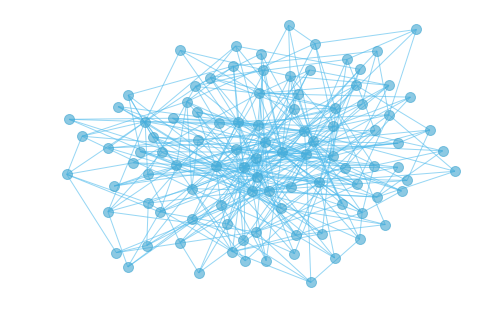

In [57]:
print("\nTotal number of edges ({})".format(nx.number_of_edges(G)))

#k_distrib(graph=G, scale='log', colour='#40a6d1', alpha=.8)
nx.draw(G, node_size=len(G.nodes()), with_labels=0, alpha=0.6, node_color="#40a6d1", edge_color="#52bced")

In [ ]:
# ____________________________________________________________________
# SECTION 2 - VISUALIZATION FUNCTION

def k_distrib(graph=G, scale='lin', colour='#40a6d1', alpha=.8, expct_lo=1, expct_hi=10, expct_const=1):
    plt.close()
    num_nodes = graph.number_of_nodes()
    max_degree = 0
    # Calculate the maximum degree to know the range of x-axis
    for n in graph.nodes():
        if graph.degree(n) > max_degree:
            max_degree = graph.degree(n)
    # X-axis and y-axis values
    x = []
    y_tmp = []
    # loop for all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree+1):
        x.append(i)
        y_tmp.append(0)
        for n in graph.nodes():
            if graph.degree(n) == i:
                y_tmp[i] += 1
        y = [i/num_nodes for i in y_tmp]
    # Plot the graph
    plt.plot(x, y,label='Degree distribution',linewidth=0, marker='o',markersize=8, color=colour, alpha=alpha)
    
    # Check for the lin / log parameter and set axes scale
    if scale == 'log':
        plt.xscale('log')
        plt.yscale('log')
        plt.title('Degree distribution (log-log scale)')
        # add theoretical distribution line k^-3
        w = [a for a in range(expct_lo,expct_hi)]
        z = []
        for i in w:
            x = (i**-3) * expct_const # set line's length and fit intercept
            z.append(x)

        plt.plot(w,z, 'k-', color='#7f7f7f')
    else:
        plt.title('Degree distribution (linear scale)')


    plt.ylabel('P(k)')
    plt.xlabel('k')
    plt.show()